# Ch.3　再生核 Hilbert 空間

In [1]:
# 第 3 章のプログラムは，事前に下記が実行されていることを仮定する。
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("seaborn-ticks")

## 3.1　RKHS

 ## 3.2　Sobolev 空間

## 3.3　Mercer の定理

### 例59

In [2]:
def Hermite(j):
    if j == 0:
        return [1]
    a = [0] * (j + 2)
    b = [0] * (j + 2)
    a[0] = 1
    for i in range(1, j + 1):
        b[0] = -a[1]
        for k in range(i + 1):
            b[k] = 2 * a[k - 1] - (k + 1) * a[k + 1]
        for h in range(j + 2):
            a[h] = b[h]
    return b[:(j+1)]

In [3]:
Hermite(1)  # 1 次の Hermite 多項式

[0, 2]

In [4]:
Hermite(2)  # 2 次の Hermite 多項式

[-2, 0, 4]

In [5]:
Hermite(3)  # 3 次の Hermite 多項式

[0, -12, 0, 8]

In [6]:
def H(j, x):
    coef = Hermite(j)
    S = 0
    for i in range(j + 1):
        S = S + np.array(coef[i]) * (x ** i)
    return S

Text(0.5, 1.0, 'Characteristic function of Gauss Kernel')

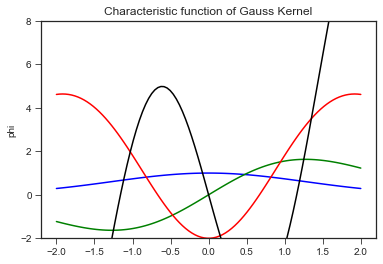

In [7]:
cc = np.sqrt(5) / 4
a = 1/4


def phi(j, x):
    return np.exp(-(cc - a) * x**2) * H(j, np.sqrt(2 * cc) * x)


color = ["b", "g", "r", "k"]
p = [[] for _ in range(4)]
x = np.linspace(-2, 2, 100)
for i in range(4):
    for k in x:
        p[i].append(phi(i, k))
    plt.plot(x, p[i], c=color[i], label="j = %d" % i)
plt.ylim(-2, 8)
plt.ylabel("phi")
plt.title("Characteristic function of Gauss Kernel")

### 例62

<ipython-input-8-3aa7a5fa501f>:22: ComplexWarning: Casting complex values to real discards the imaginary part
  alpha[:, i] = vectors[i, :] * np.sqrt(m) / (values[i] + 10e-16)


Text(0.5, 1.0, 'Eigen Values and their Eigen Functions')

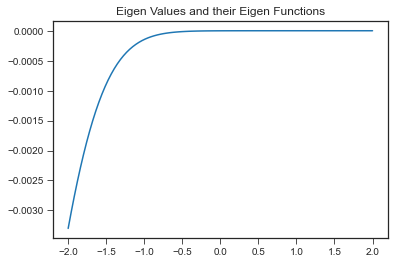

In [8]:
# カーネルの定義
sigma = 1


def k(x, y):
    return np.exp(-(x - y)**2 / sigma**2)


# サンプルの発生とグラム行列の設定
m = 300
x = np.random.randn(m) - 2 * np.random.randn(m)**2 + 3 * np.random.randn(m)**3

# 固有値と固有ベクトル
K = np.zeros((m, m))
for i in range(m):
    for j in range(m):
        K[i, j] = k(x[i], x[j])
    values, vectors = np.linalg.eig(K)
    lam = values / m
    alpha = np.zeros((m, m))
    for i in range(m):
        alpha[:, i] = vectors[i, :] * np.sqrt(m) / (values[i] + 10e-16)


# グラフの表示
def F(y, i):
    S = 0
    for j in range(m):
        S = S + alpha[j, i] * k(x[j], y)
        return S


i = 1  # i を変えて実行する


def G(y):
    return F(y, i)


w = np.linspace(-2, 2, 100)
plt.plot(w, G(w))
plt.title("Eigen Values and their Eigen Functions")